In [1]:
!pip install adtk

     |████████████████████████████████| 60 kB 4.3 MB/s 


In [2]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 6.4 MB 16.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [8]:
from dateutil.relativedelta import relativedelta
import yfinance as yf
from datetime import date
from datetime import datetime
my_date = date.today()
my_time = datetime.min.time()
end = datetime.combine(my_date, my_time)
start = end - relativedelta(years=2)
data = yf.download("SBIN.NS", start, end)
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-29,508.100006,512.500000,494.000000,496.299988,496.299988,12894773
2022-05-02,492.649994,495.000000,481.299988,491.000000,491.000000,18590895
2022-05-04,492.000000,496.450012,477.500000,479.649994,479.649994,14645323
2022-05-05,485.000000,494.000000,478.649994,480.000000,480.000000,14130385
2022-05-06,471.000000,486.100006,471.000000,483.950012,483.950012,16710020


In [10]:
import pandas as pd
pd.date_range(start=start, end=end).difference(data.index)

DatetimeIndex(['2020-05-09', '2020-05-10', '2020-05-16', '2020-05-17',
               '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-30',
               '2020-05-31', '2020-06-06',
               ...
               '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-23',
               '2022-04-24', '2022-04-30', '2022-05-01', '2022-05-03',
               '2022-05-07', '2022-05-08'],
              dtype='datetime64[ns]', length=233, freq=None)

In [12]:
idx = pd.date_range(start, end)
data = data.reindex(idx)
print(data)

                  Open        High         Low       Close   Adj Close  \
2020-05-08  172.449997  173.800003  166.100006  166.649994  165.125473   
2020-05-09         NaN         NaN         NaN         NaN         NaN   
2020-05-10         NaN         NaN         NaN         NaN         NaN   
2020-05-11  167.949997  168.899994  165.000000  165.449997  163.936447   
2020-05-12  164.199997  168.500000  160.850006  166.899994  165.373184   
...                ...         ...         ...         ...         ...   
2022-05-04  492.000000  496.450012  477.500000  479.649994  479.649994   
2022-05-05  485.000000  494.000000  478.649994  480.000000  480.000000   
2022-05-06  471.000000  486.100006  471.000000  483.950012  483.950012   
2022-05-07         NaN         NaN         NaN         NaN         NaN   
2022-05-08         NaN         NaN         NaN         NaN         NaN   

                Volume  
2020-05-08  55932236.0  
2020-05-09         NaN  
2020-05-10         NaN  
2020-05-11 

In [14]:
data.fillna(method="ffill", inplace=True)
print(data)

                  Open        High         Low       Close   Adj Close  \
2020-05-08  172.449997  173.800003  166.100006  166.649994  165.125473   
2020-05-09  172.449997  173.800003  166.100006  166.649994  165.125473   
2020-05-10  172.449997  173.800003  166.100006  166.649994  165.125473   
2020-05-11  167.949997  168.899994  165.000000  165.449997  163.936447   
2020-05-12  164.199997  168.500000  160.850006  166.899994  165.373184   
...                ...         ...         ...         ...         ...   
2022-05-04  492.000000  496.450012  477.500000  479.649994  479.649994   
2022-05-05  485.000000  494.000000  478.649994  480.000000  480.000000   
2022-05-06  471.000000  486.100006  471.000000  483.950012  483.950012   
2022-05-07  471.000000  486.100006  471.000000  483.950012  483.950012   
2022-05-08  471.000000  486.100006  471.000000  483.950012  483.950012   

                Volume  
2020-05-08  55932236.0  
2020-05-09  55932236.0  
2020-05-10  55932236.0  
2020-05-11 

In [15]:
from adtk.data import validate_series
data = validate_series(data)
print(data)

                  Open        High         Low       Close   Adj Close  \
2020-05-08  172.449997  173.800003  166.100006  166.649994  165.125473   
2020-05-09  172.449997  173.800003  166.100006  166.649994  165.125473   
2020-05-10  172.449997  173.800003  166.100006  166.649994  165.125473   
2020-05-11  167.949997  168.899994  165.000000  165.449997  163.936447   
2020-05-12  164.199997  168.500000  160.850006  166.899994  165.373184   
...                ...         ...         ...         ...         ...   
2022-05-04  492.000000  496.450012  477.500000  479.649994  479.649994   
2022-05-05  485.000000  494.000000  478.649994  480.000000  480.000000   
2022-05-06  471.000000  486.100006  471.000000  483.950012  483.950012   
2022-05-07  471.000000  486.100006  471.000000  483.950012  483.950012   
2022-05-08  471.000000  486.100006  471.000000  483.950012  483.950012   

                Volume  
2020-05-08  55932236.0  
2020-05-09  55932236.0  
2020-05-10  55932236.0  
2020-05-11 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb0ae9fd90>,
      dtype=object)

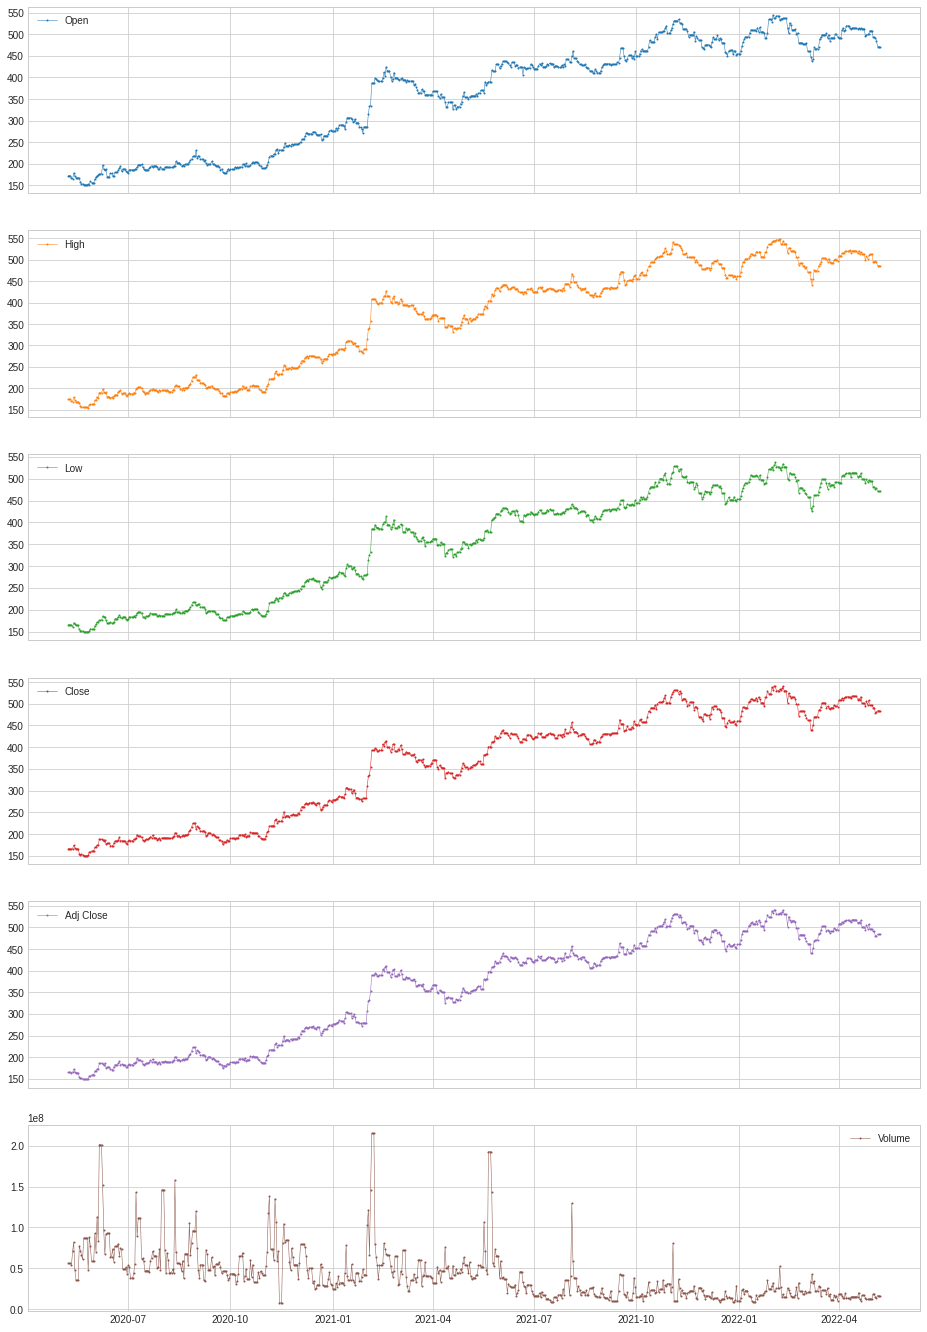

In [21]:
from adtk.visualization import plot
plot(data)

In [22]:
data.dropna(inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdaf8b5ce90>,
      dtype=object)

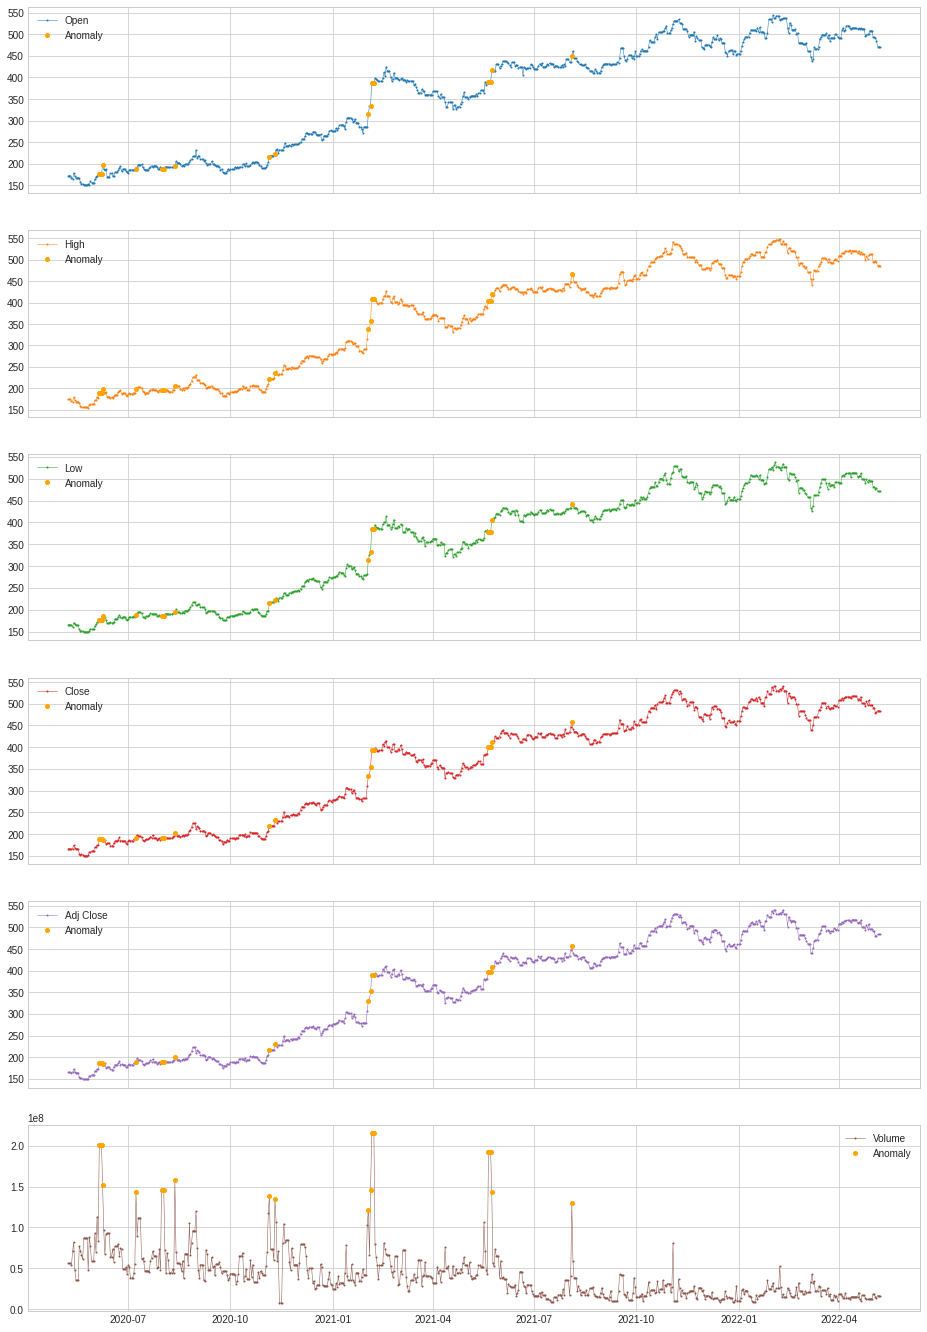

In [24]:
from adtk.detector import SeasonalAD
seasonal_vol = SeasonalAD()
anomalies = seasonal_vol.fit_detect(data["Volume"])
plot(data, anomaly=anomalies, anomaly_color="orange", anomaly_tag="marker")

In [25]:
anomalies.value_counts()

False    710
True      21
Name: Volume, dtype: int64

In [28]:
anomalies_pred = seasonal_vol.detect(data)
print(anomalies_pred)

             Open   High    Low  Close  Adj Close  Volume
2020-05-08  False  False  False  False      False   False
2020-05-09  False  False  False  False      False   False
2020-05-10  False  False  False  False      False   False
2020-05-11  False  False  False  False      False   False
2020-05-12  False  False  False  False      False   False
...           ...    ...    ...    ...        ...     ...
2022-05-04  False  False  False  False      False   False
2022-05-05  False  False  False  False      False   False
2022-05-06  False  False  False  False      False   False
2022-05-07  False  False  False  False      False   False
2022-05-08  False  False  False  False      False   False

[731 rows x 6 columns]


In [29]:
print('Average closing price', data['Close'].mean())
print('Minimum closing price', data['Close'].min())
print('Maximum closing price',data['Close'].max())

Average closing price 360.5287282711504
Minimum closing price 150.85000610351562
Maximum closing price 540.5499877929688


In [30]:
from adtk.detector import ThresholdAD
threshold_val = ThresholdAD(high=530, low=180)
anomalies_thresh = threshold_val.detect(data["Close"])

In [31]:
anomalies_thresh.value_counts()

False    677
True      54
Name: Close, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdaf6d94790>,
      dtype=object)

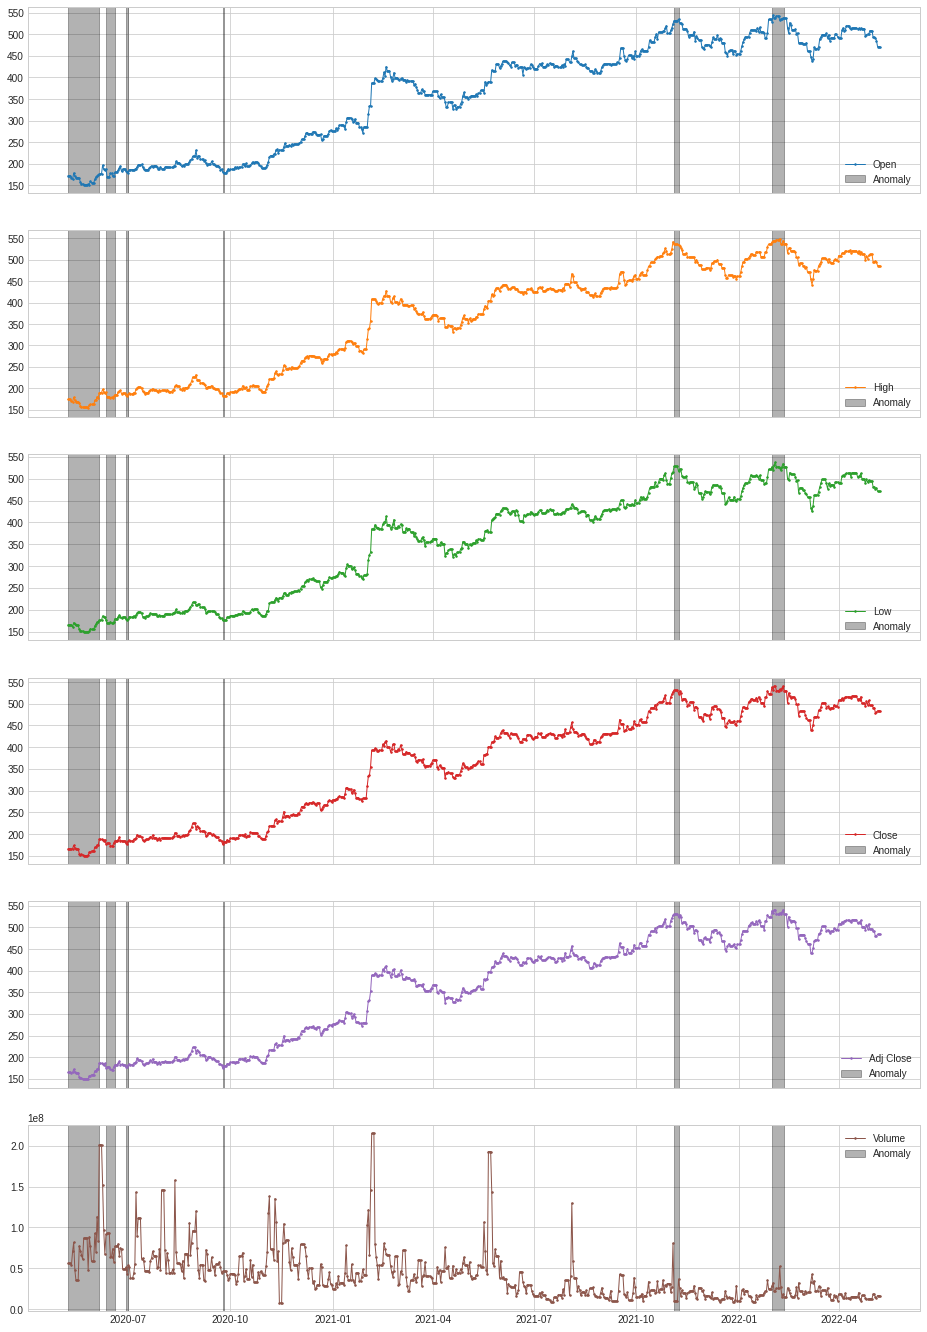

In [32]:
from adtk.visualization import plot
plot(data, anomaly=anomalies_thresh, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color="black")